In [1]:
in_path =r'../../data/raw/' # use your path
out_path= "../../data/clean/"

import pandas as pd
pd.set_option('display.max_columns', 500)
import glob
import re
from nltk import stem
porter = stem.porter.PorterStemmer()
from gensim import corpora, models, similarities
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\gensim\utils.py:840: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\gensim\utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [2]:
allFiles = glob.glob(in_path + "/*.txt")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df_ = pd.read_table(file_,index_col=False, header=0)
    list_.append(df_)
df = pd.concat(list_)
df=df[~df.AB.isnull()]
df=df[(df.DT!='Correction') & (df.DT!='Editorial Material')]
df=df[df.PY<2016]
df=df[df.PY>=1990]
df.reset_index(inplace=True, drop=True)
df['id']=df.index
df.to_csv(out_path+"articles.csv")
print len(df)
node=df[['id','TI','PY','SO']]
node.rename(columns={'TI':'label'},inplace=True)
node.to_csv('../csv/nodes.csv',index=False)

2101


C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


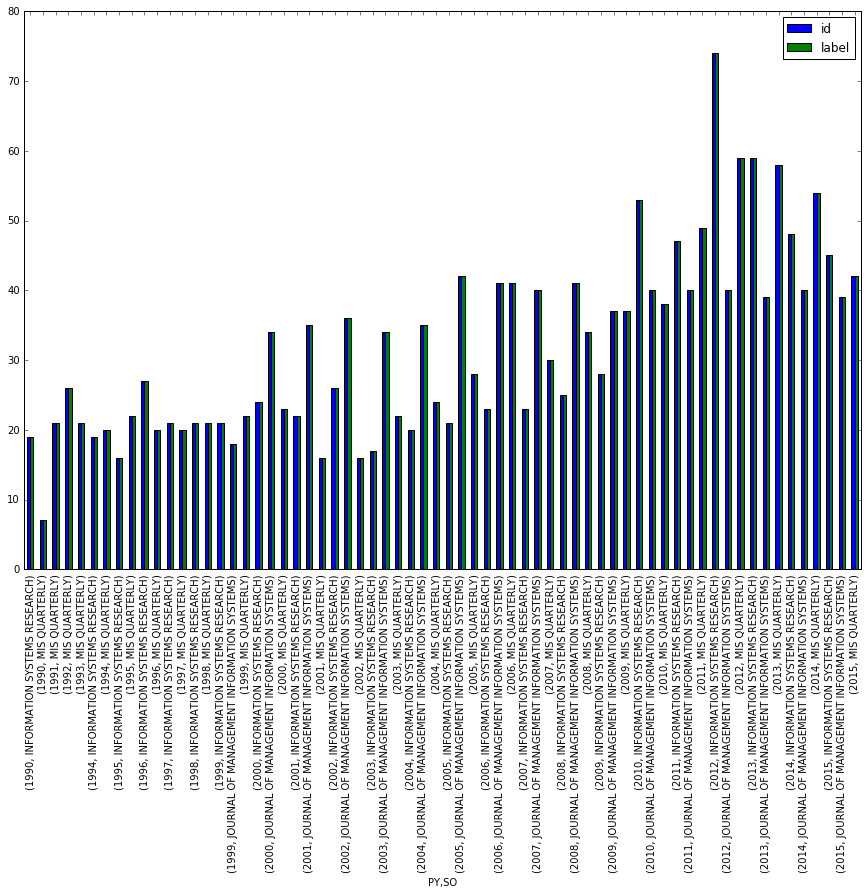

In [3]:
node.groupby(['PY','SO']).count().plot(kind='bar',figsize=(15,10))